In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import json

# Load Data Pada CSV dan Proses menjadi Data Time Series

In [24]:
#Load data csv dan format data tahun bulan menjadi data frame
df = pd.read_csv('DATASET_PAJAK_HOTEL.csv')
df['tahun'] = pd.to_datetime(df['tahun_bulan'])

In [48]:
#Buat data tiemseries berdasar key value dari data frame
dts = pd.Series(data=df['jml_setor'].values, index=df['tahun'])
dts.info()
json_data = dts.to_json(date_format='iso')
print(json_data)
with open('./datasets/hotel.json', 'w') as f:
    json.dump(json_data, f) 

<class 'pandas.core.series.Series'>
DatetimeIndex: 180 entries, 2007-01-01 to 2021-12-01
Series name: None
Non-Null Count  Dtype
--------------  -----
180 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB
{"2007-01-01T00:00:00.000":969646,"2007-02-01T00:00:00.000":51237546,"2007-03-01T00:00:00.000":44745946,"2007-04-01T00:00:00.000":71632678,"2007-05-01T00:00:00.000":66687601,"2007-06-01T00:00:00.000":89597411,"2007-07-01T00:00:00.000":65887461,"2007-08-01T00:00:00.000":83654840,"2007-09-01T00:00:00.000":76353701,"2007-10-01T00:00:00.000":80214360,"2007-11-01T00:00:00.000":80922262,"2007-12-01T00:00:00.000":73069860,"2008-01-01T00:00:00.000":106654840,"2008-02-01T00:00:00.000":40048620,"2008-03-01T00:00:00.000":39463500,"2008-04-01T00:00:00.000":77160120,"2008-05-01T00:00:00.000":84685164,"2008-06-01T00:00:00.000":94931221,"2008-07-01T00:00:00.000":141630123,"2008-08-01T00:00:00.000":77472200,"2008-09-01T00:00:00.000":110731300,"2008-10-01T00:00:00.000":129620400,"2008-11-01T00:0

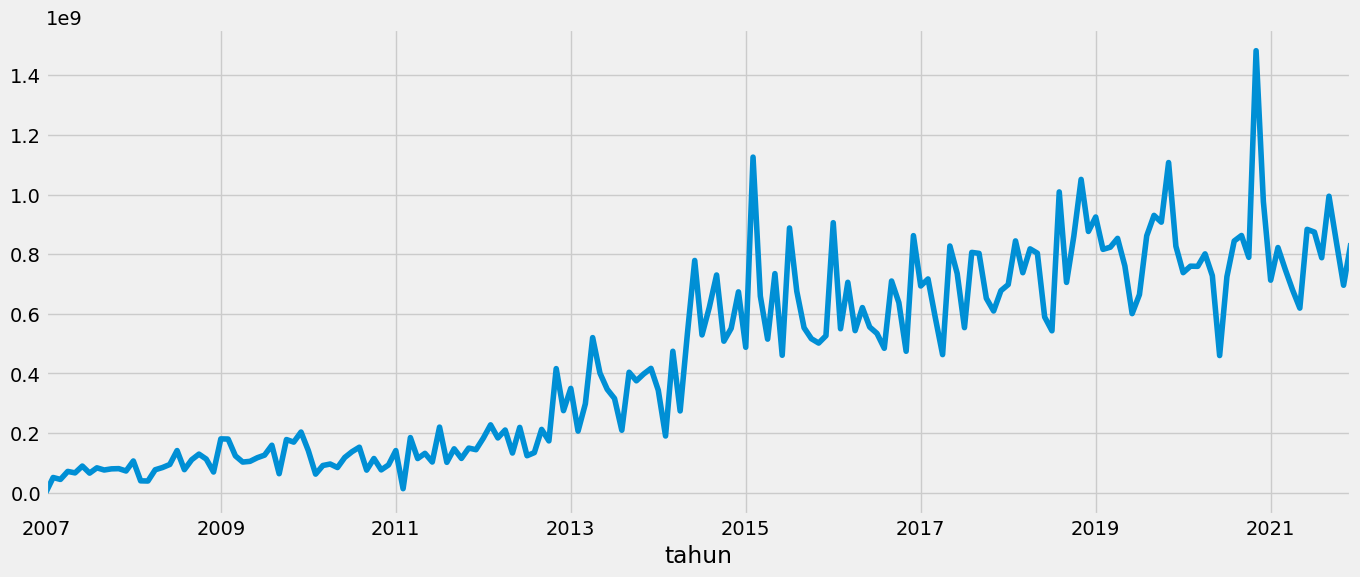

In [26]:
#data deret waktu menjadi chart
dts.plot(figsize=(15, 6))
plt.show()

# Mencari parameter terbaik ARIMA p, d, q

In [42]:
# Tentukan parameter p, d, dan q untuk mengambil nilai antara 0 sampai 2
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Hasilkan semua kombinasi berbeda dari triplet p, q, dan q musiman
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [43]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_result = [[0, 0, 1],[0, 0, 1, 12], 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)
            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))
            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
print('\nBest Result:', best_result)

ARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC: 47849.0383763515
ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC: 7690.924055905634
ARIMA(0, 0, 0) x (0, 0, 2, 12) - AIC: 7712.816408508475
ARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC: 6875.061130090568
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC: 6870.058614057022
ARIMA(0, 0, 0) x (0, 1, 2, 12) - AIC: 6878.222673007616
ARIMA(0, 0, 0) x (0, 2, 0, 12) - AIC: 9.711196698674408e+21
ARIMA(0, 0, 0) x (0, 2, 1, 12) - AIC: 6441.791422130253
ARIMA(0, 0, 0) x (0, 2, 2, 12) - AIC: 6455.0578519541195
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC: 7389.728219047107
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC: 7385.564351932646
ARIMA(0, 0, 0) x (1, 0, 2, 12) - AIC: 7389.594484336987
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC: 6866.275932159222
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC: 6870.332942894842
ARIMA(0, 0, 0) x (1, 1, 2, 12) - AIC: 6876.328340801523
ARIMA(0, 0, 0) x (1, 2, 0, 12) - AIC: 6452.899557398396
ARIMA(0, 0, 0) x (1, 2, 1, 12) - AIC: 6413.225375238604
ARIMA(0, 0, 0) x (1, 2, 2, 12) - AIC: 6416.2

In [58]:
best_result = [[1, 0, 0], [0, 1, 1, 12]]

# Plot model diagnostics

In [59]:
# latih model dengan dataset dan parameter optimal
mod = sm.tsa.statespace.SARIMAX(dts, order=(best_result[0][0], best_result[0][1], best_result[0][2]), seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=True,enforce_invertibility=True,)
results = mod.fit()

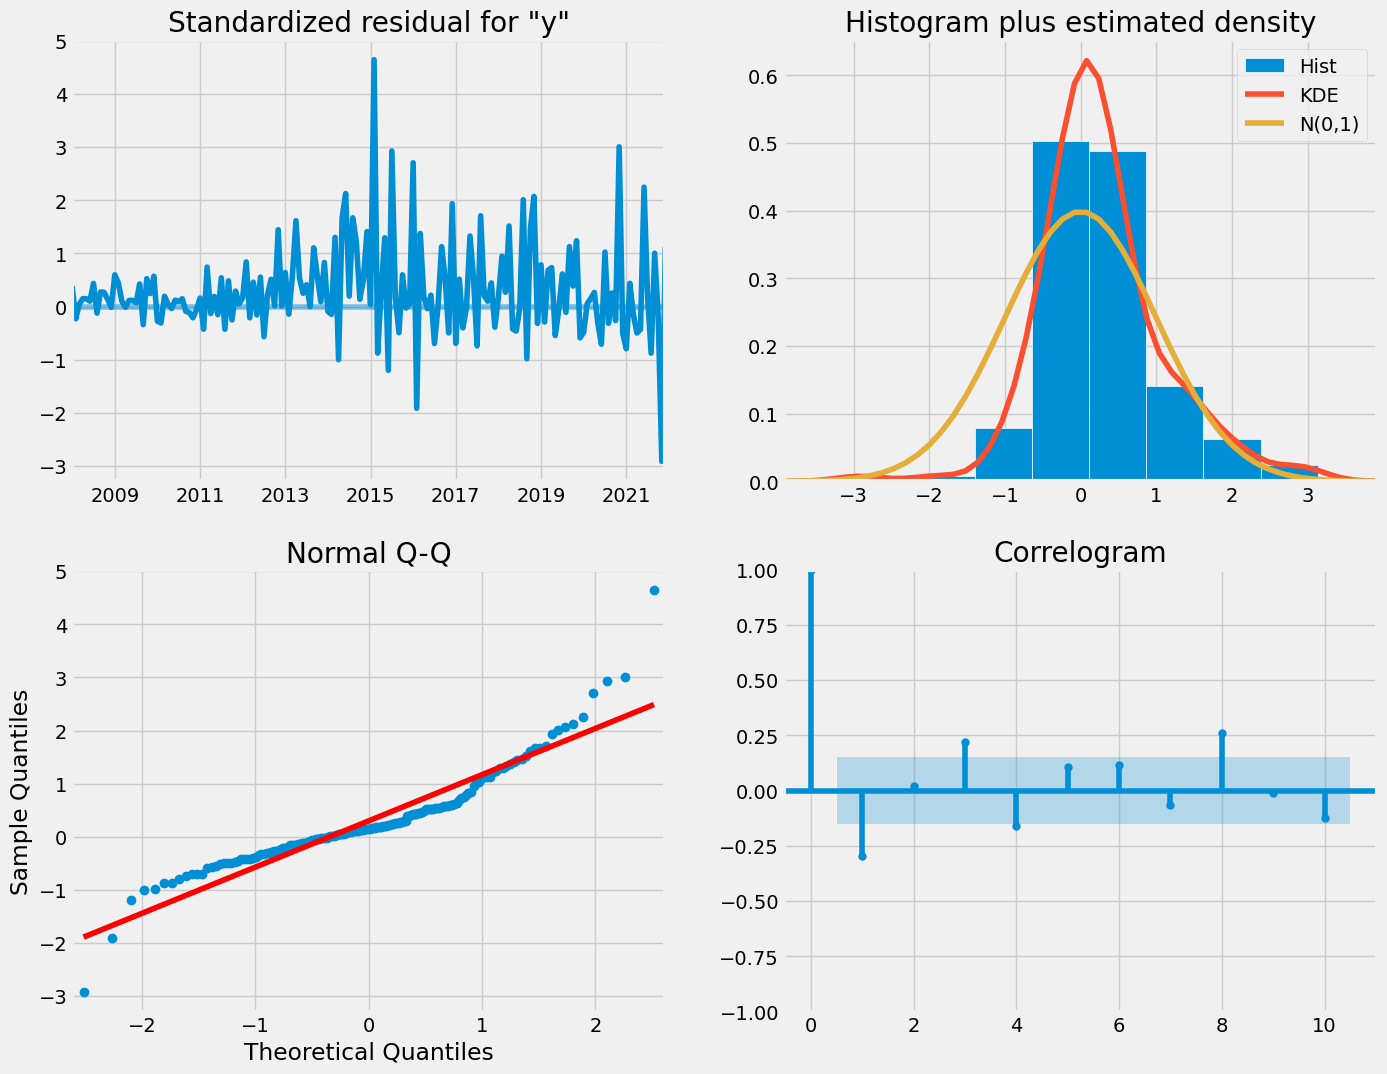

In [60]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

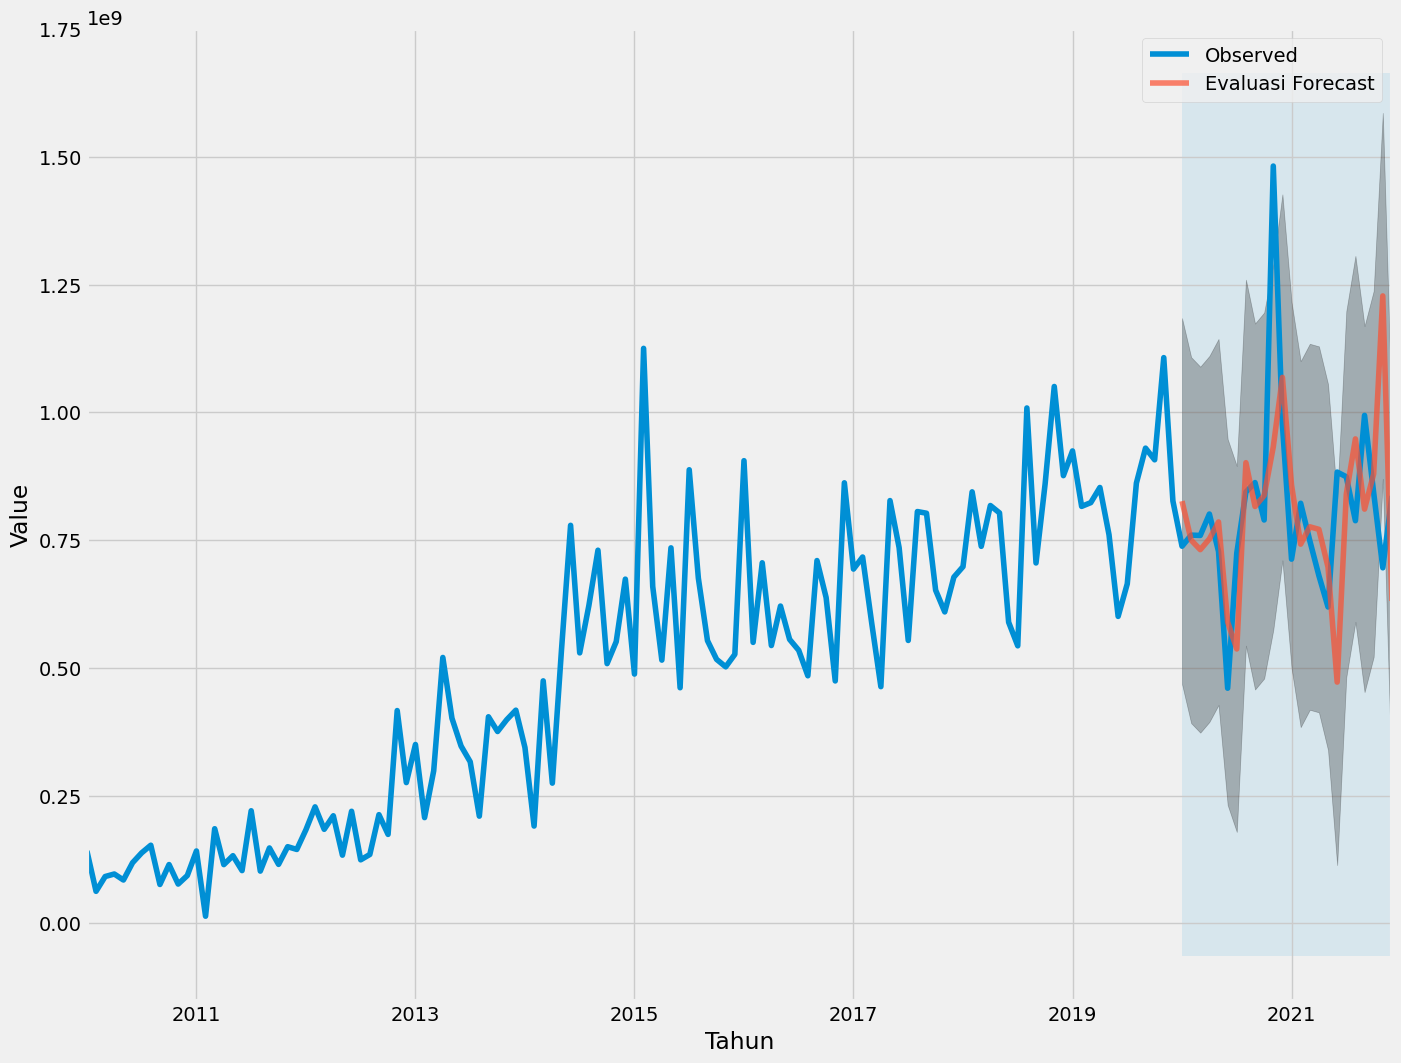

In [61]:
# prediksi data 2 tahun terbaru dari dataset dan bandingkan
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dts['2010':].plot(label='Observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='Evaluasi Forecast', alpha=.7)
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-01'), dts.index[-1],alpha=.1, zorder=-1)
ax.set_xlabel('Tahun')
ax.set_ylabel('Value')
plt.legend()
plt.show()

In [62]:
# Extract the predicted and true values of our time series
y_forecasted = pred.predicted_mean
y_truth = dts['2020-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error forecasts adalah {}'.format(round(mse, 2)))

The Mean Squared Error forecasts adalah 4.0996260750850504e+16


In [63]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

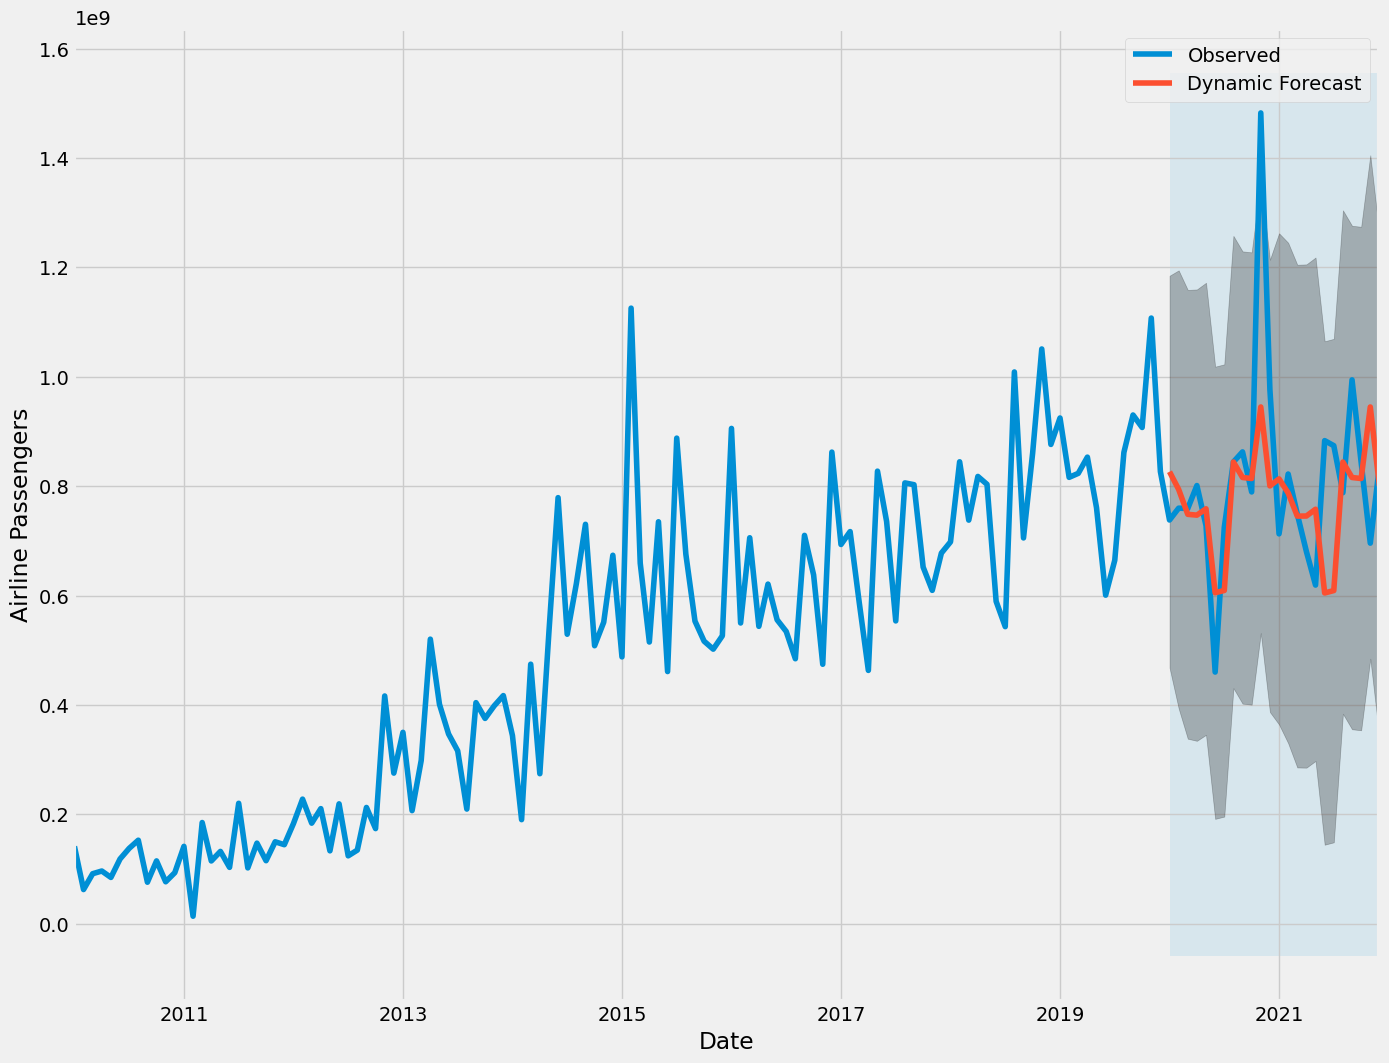

In [64]:
ax = dts['2010':].plot(label='Observed', figsize=(15, 12))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-01'), dts.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()

# Prediksi data selama 2 tahun

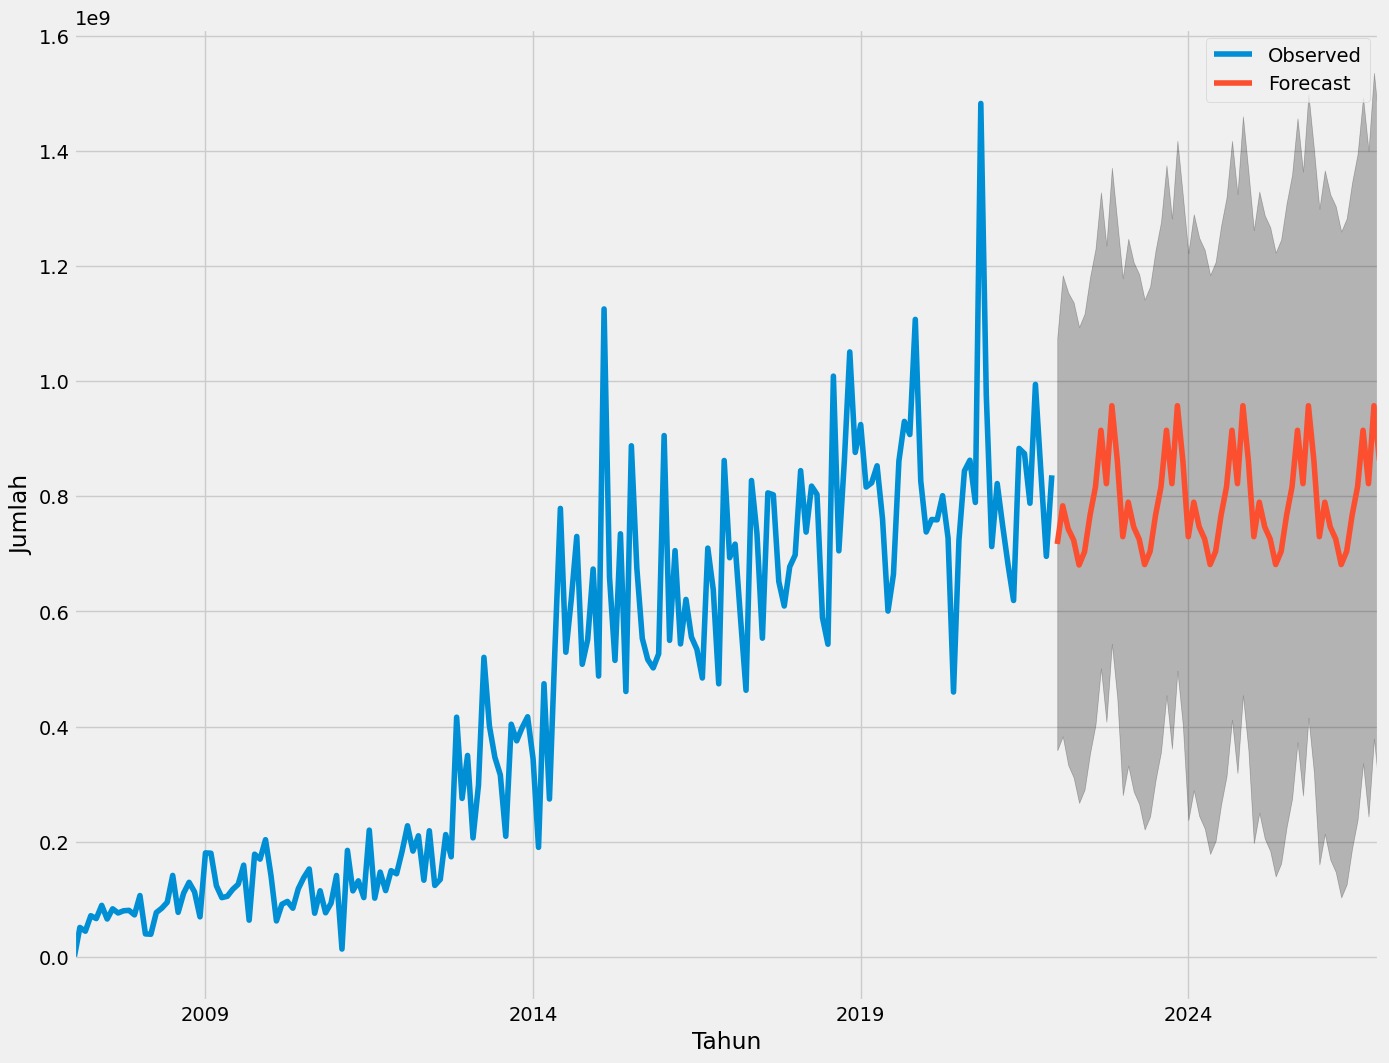

{"2022-01-01T00:00:00.000":717145405.9849336147,"2022-02-01T00:00:00.000":783452207.9492229223,"2022-03-01T00:00:00.000":743523876.0612674952,"2022-04-01T00:00:00.000":724011312.4980592728,"2022-05-01T00:00:00.000":680722936.2511054277,"2022-06-01T00:00:00.000":703832852.9430546761,"2022-07-01T00:00:00.000":766996782.5129406452,"2022-08-01T00:00:00.000":816436261.0876617432,"2022-09-01T00:00:00.000":914633717.6842342615,"2022-10-01T00:00:00.000":821949274.5575554371,"2022-11-01T00:00:00.000":957277636.6204428673,"2022-12-01T00:00:00.000":861931915.1281853914,"2023-01-01T00:00:00.000":729859996.9683419466,"2023-02-01T00:00:00.000":789798040.8556464911,"2023-03-01T00:00:00.000":746691071.5557035208,"2023-04-01T00:00:00.000":725592054.9235054255,"2023-05-01T00:00:00.000":681511882.3771008253,"2023-06-01T00:00:00.000":704226614.7474470139,"2023-07-01T00:00:00.000":767193308.4270551205,"2023-08-01T00:00:00.000":816534346.8707104921,"2023-09-01T00:00:00.000":914682672.1484820843,"2023-10-01T

In [65]:
# prediksi 24 langkah ke depan di masa mendatang
pred_uc = results.get_forecast(steps=60, dynamic=True, full_results=True)
pred_ci = pred_uc.conf_int()
ax = dts.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Tahun')
ax.set_ylabel('Jumlah')
plt.legend()
plt.show()


json_data = pred_uc.predicted_mean.to_json(date_format='iso')
print(json_data)
with open('./datasets/hotel_predicted.json', 'w') as f:
    json.dump(json_data, f) 